# Dominic's Spotify Analysis Report (21 November 2023)

In [1]:
import pandas as pd
import requests
import base64
import json
import urllib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

The source and structure of the data used in this report originated from Spotify for Developers. This is a useful tool presented directly from Spotify that allows the user to utilize Web API to retrieve information from the Spotify catalog about artists, tracks, and playlists. It contains large amounts of data that are useful for working with.

In the code below, I have commented out my personal data, keys, tokens, and secrets. The process used my specific Spotify information and account.

In [2]:
Client_ID = pd.read_csv('Spotify_IDs')['Client_ID'].iloc[0]

In [3]:
Client_Secret = pd.read_csv('Spotify_IDs')['Client_Secret'].iloc[0]

In [4]:
# Client_ID

In [5]:
# Client_Secret

In [6]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [7]:
# client_cred

In [8]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [9]:
# headers

In [10]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [11]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [12]:
session_key_response.status_code

200

In [13]:
# session_key_response.json()['access_token']

In [14]:
session_header_key = session_key_response.json()

In [15]:
key = session_header_key['access_token']

In [16]:
session_headers = {"Authorization": "Bearer {}".format(key)}

In [17]:
# session_headers

The following code searches for the album by Luke Combs, "What You See Ain't Always What You Get" 

I chose this album because Luke Combs was the first country artist that ever resonated with me. I have a love and passion for country music that I feel many people may not understand unless you are a true country fan. Nevertheless, this album is important to me because Luke Combs is one of my favorite country singers. I have never been to a concert before and I have always said that it will be the first concert I'll ever attend.

In [18]:
#Luke Combs
search_url = 'https://api.spotify.com/v1/albums/25TJxI6ZH6XjT8geRQAFz5' #Luke Combs Album URL

In [19]:
search_result = requests.get(search_url, headers = session_headers)

In [20]:
combs_tracks_results = search_result.json() 

In [21]:
combs_tracks_results.keys() #keys within the album

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [22]:
combs_tracks_results['tracks']['items'][0].keys() #pulling the tracks & items keys from within the album

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [23]:
combs_tracks_df = pd.DataFrame(combs_tracks_results['tracks']['items'])
#create a DataFrame based on the tracks and items within the album

In [24]:
combs_tracks_df.head() #visualize the head of that DataFrame

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,186733,False,{'spotify': 'https://open.spotify.com/track/3t...,https://api.spotify.com/v1/tracks/3t5CI2xqUByt...,3t5CI2xqUBytrGJGsBqmUV,False,Beer Never Broke My Heart,https://p.scdn.co/mp3-preview/545db391946df7d9...,1,track,spotify:track:3t5CI2xqUBytrGJGsBqmUV
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,204240,False,{'spotify': 'https://open.spotify.com/track/70...,https://api.spotify.com/v1/tracks/70ECd4rOaE5a...,70ECd4rOaE5aSNTPLMB8DS,False,Refrigerator Door,https://p.scdn.co/mp3-preview/e0cbfe82d6902831...,2,track,spotify:track:70ECd4rOaE5aSNTPLMB8DS
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,225253,False,{'spotify': 'https://open.spotify.com/track/5J...,https://api.spotify.com/v1/tracks/5JpI6jI6wKwk...,5JpI6jI6wKwk0wZJ6VN75b,False,Even Though I'm Leaving,https://p.scdn.co/mp3-preview/5dc213a8764007bc...,3,track,spotify:track:5JpI6jI6wKwk0wZJ6VN75b
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,194866,False,{'spotify': 'https://open.spotify.com/track/0I...,https://api.spotify.com/v1/tracks/0IyIAxDXYOJM...,0IyIAxDXYOJMHLsTLrbOfy,False,Lovin' On You,https://p.scdn.co/mp3-preview/05df3c5e3aef5e4f...,4,track,spotify:track:0IyIAxDXYOJMHLsTLrbOfy
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,204640,False,{'spotify': 'https://open.spotify.com/track/2U...,https://api.spotify.com/v1/tracks/2UWFCFlnz7n4...,2UWFCFlnz7n4CD1hWZDyIw,False,Moon Over Mexico,https://p.scdn.co/mp3-preview/96ff781769d99c89...,5,track,spotify:track:2UWFCFlnz7n4CD1hWZDyIw


In [25]:
first_artist = [x['artists'][0]['name'] for x in combs_tracks_results['tracks']['items']]

In [26]:
combs_tracks_df['first_artist'] = first_artist

In [27]:
urllib.parse.quote(','.join(list(combs_tracks_df['id'])))

'3t5CI2xqUBytrGJGsBqmUV%2C70ECd4rOaE5aSNTPLMB8DS%2C5JpI6jI6wKwk0wZJ6VN75b%2C0IyIAxDXYOJMHLsTLrbOfy%2C2UWFCFlnz7n4CD1hWZDyIw%2C7MJCMDMjIfy2uyhy0BmG4v%2C14pAyQr2df47wNP0edKeAX%2C7oBSMKLGwAo1RNILzordRQ%2C2gw4p9rDwZTMpLDEFEQk3p%2C3xPEt3xIfaww7C0jeO5EoT%2C1qF3tGI2bBOPm6G5pygE15%2C42xGVMSeNRGMwNwAAKae4B%2C5YL4b69ecFCG6bfZIY2lI7%2C0dGt5iXBcHZWMN8N8EmJIP%2C5qJX56Oh2tnM3yVYs9Tz63%2C1vms08pCx138Xa2mstygP0%2C4UkVEMXCcbKJRHoeGhs3I8%2C0tDOIR44aeHGLB5gpK1Gfn%2C7IWV29mryrqtO0JVgnPtfv%2C0jcZ1uIHmvh6Is9T6hXOUk%2C3PwtBxiuJGVGHFfHjOjTpY%2C3zxAw8PaqpeGZ3Pakkxv3J%2C6IBcOGPsniK3Pso1wHIhew'

In [28]:
combs_audio_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(urllib.parse.quote(','.join(list(combs_tracks_df['id']))))

In [29]:
features_response = requests.get(url = combs_audio_features_url, headers = session_headers)

In [30]:
combs_track_features = features_response.json()

In [31]:
combs_track_features_df = pd.DataFrame(combs_track_features['audio_features']) 

In [32]:
combs_track_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.538,0.863,1,-4.483,1,0.0481,0.01390,0.000000,0.0874,0.637,77.001,audio_features,3t5CI2xqUBytrGJGsBqmUV,spotify:track:3t5CI2xqUBytrGJGsBqmUV,https://api.spotify.com/v1/tracks/3t5CI2xqUByt...,https://api.spotify.com/v1/audio-analysis/3t5C...,186733,4
1,0.459,0.864,1,-4.397,1,0.0590,0.01100,0.000003,0.3140,0.623,74.867,audio_features,70ECd4rOaE5aSNTPLMB8DS,spotify:track:70ECd4rOaE5aSNTPLMB8DS,https://api.spotify.com/v1/tracks/70ECd4rOaE5a...,https://api.spotify.com/v1/audio-analysis/70EC...,204240,4
2,0.554,0.755,2,-6.040,1,0.0319,0.22500,0.000000,0.3010,0.624,77.962,audio_features,5JpI6jI6wKwk0wZJ6VN75b,spotify:track:5JpI6jI6wKwk0wZJ6VN75b,https://api.spotify.com/v1/tracks/5JpI6jI6wKwk...,https://api.spotify.com/v1/audio-analysis/5JpI...,225253,4
3,0.572,0.949,4,-4.865,1,0.0600,0.00165,0.000195,0.1630,0.530,118.974,audio_features,0IyIAxDXYOJMHLsTLrbOfy,spotify:track:0IyIAxDXYOJMHLsTLrbOfy,https://api.spotify.com/v1/tracks/0IyIAxDXYOJM...,https://api.spotify.com/v1/audio-analysis/0IyI...,194867,4
4,0.493,0.772,7,-5.875,1,0.0452,0.45600,0.000003,0.1070,0.472,140.996,audio_features,2UWFCFlnz7n4CD1hWZDyIw,spotify:track:2UWFCFlnz7n4CD1hWZDyIw,https://api.spotify.com/v1/tracks/2UWFCFlnz7n4...,https://api.spotify.com/v1/audio-analysis/2UWF...,204640,4


The next section of code is the same process used to get the album by Luke Combs, only this code is now retrieving the album information from Flordia Georgia Line, "Anything Goes."

I chose this album because, similar to Luke Combs, Florida Georgia Line was one of the first country artists I related to through their music. This album is significant to me simply because of the title. Anything in this life, no matter what we do, goes. You can interpret that however, you understand it. Meaning, to me, I can go anywhere and do anything I set my heart and mind to. Maybe you understand it according to the song and theme of the album, "Anything goes on a Friday night." If this means to kick back, have fun, and enjoy the little things in life when you aren't buried by burdens, then so be it!

In [33]:
#Florida Georgia Line
search_url2 = 'https://api.spotify.com/v1/albums/5NG7WZaCZZ12M5LJm0JcVc' #Luke Combs Album URL

In [34]:
search_result2 = requests.get(search_url2, headers = session_headers)

In [35]:
fgl_tracks_results = search_result2.json() 

In [36]:
fgl_tracks_results.keys() #keys within the album

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [37]:
fgl_tracks_results['tracks']['items'][0].keys() #pulling the tracks & items keys from within the album

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [38]:
fgl_tracks_df = pd.DataFrame(fgl_tracks_results['tracks']['items'])
#create a DataFrame based on the tracks and items within the album

In [39]:
fgl_tracks_df.head() #visualize the head of that DataFrame

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,218866,False,{'spotify': 'https://open.spotify.com/track/46...,https://api.spotify.com/v1/tracks/46ZfPS5VpSQV...,46ZfPS5VpSQVU5gb82hg3K,False,Anything Goes,None,1,track,spotify:track:46ZfPS5VpSQVU5gb82hg3K
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,184706,False,{'spotify': 'https://open.spotify.com/track/0E...,https://api.spotify.com/v1/tracks/0El2Zyt68nYy...,0El2Zyt68nYySFDG87hZgM,False,Sun Daze,None,2,track,spotify:track:0El2Zyt68nYySFDG87hZgM
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,196373,False,{'spotify': 'https://open.spotify.com/track/0V...,https://api.spotify.com/v1/tracks/0VhjSCScYGOm...,0VhjSCScYGOmEKr24FBNSM,False,Good Good,None,3,track,spotify:track:0VhjSCScYGOmEKr24FBNSM
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,230586,False,{'spotify': 'https://open.spotify.com/track/5C...,https://api.spotify.com/v1/tracks/5CXnIPD6rTjs...,5CXnIPD6rTjszYYQm6fY2P,False,Dirt,None,4,track,spotify:track:5CXnIPD6rTjszYYQm6fY2P
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,169866,False,{'spotify': 'https://open.spotify.com/track/0b...,https://api.spotify.com/v1/tracks/0bPiq3JmsZEr...,0bPiq3JmsZErLIkhVqajp9,False,Smile,None,5,track,spotify:track:0bPiq3JmsZErLIkhVqajp9


In [40]:
second_artist = [x['artists'][0]['name'] for x in fgl_tracks_results['tracks']['items']]

In [41]:
fgl_tracks_df['second_artist'] = second_artist

In [42]:
urllib.parse.quote(','.join(list(fgl_tracks_df['id'])))

'46ZfPS5VpSQVU5gb82hg3K%2C0El2Zyt68nYySFDG87hZgM%2C0VhjSCScYGOmEKr24FBNSM%2C5CXnIPD6rTjszYYQm6fY2P%2C0bPiq3JmsZErLIkhVqajp9%2C0H9Q7Vzu8nYRDBZYKbtU8d%2C4o9wvGpLZi4pla9CxvDsHb%2C5ygp81TQpolYKghQjdYZpD%2C4FHMYgQiGlji1CcYCCHzOT%2C6IFPfV8PNSYOmufzQ95hmm%2C2ncMlnrDwSfnYnV5ixxuib%2C5Z2gIlGW3YwlOuxHUvDCSH'

In [43]:
fgl_audio_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(urllib.parse.quote(','.join(list(fgl_tracks_df['id']))))

In [44]:
features_response2 = requests.get(url = fgl_audio_features_url, headers = session_headers)

In [45]:
fgl_track_features = features_response2.json()

In [46]:
fgl_track_features_df = pd.DataFrame(fgl_track_features['audio_features'])

In [47]:
fgl_track_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.458,0.976,0,-3.791,1,0.0459,0.00182,0.000000,0.1930,0.760,154.007,audio_features,46ZfPS5VpSQVU5gb82hg3K,spotify:track:46ZfPS5VpSQVU5gb82hg3K,https://api.spotify.com/v1/tracks/46ZfPS5VpSQV...,https://api.spotify.com/v1/audio-analysis/46Zf...,218867,4
1,0.476,0.952,4,-3.783,1,0.0410,0.09810,0.000003,0.4380,0.849,170.062,audio_features,0El2Zyt68nYySFDG87hZgM,spotify:track:0El2Zyt68nYySFDG87hZgM,https://api.spotify.com/v1/tracks/0El2Zyt68nYy...,https://api.spotify.com/v1/audio-analysis/0El2...,184707,4
2,0.482,0.944,11,-3.703,1,0.0453,0.02250,0.000008,0.3360,0.754,160.033,audio_features,0VhjSCScYGOmEKr24FBNSM,spotify:track:0VhjSCScYGOmEKr24FBNSM,https://api.spotify.com/v1/tracks/0VhjSCScYGOm...,https://api.spotify.com/v1/audio-analysis/0Vhj...,196373,4
3,0.547,0.878,2,-4.224,1,0.0451,0.06380,0.000007,0.1060,0.592,121.973,audio_features,5CXnIPD6rTjszYYQm6fY2P,spotify:track:5CXnIPD6rTjszYYQm6fY2P,https://api.spotify.com/v1/tracks/5CXnIPD6rTjs...,https://api.spotify.com/v1/audio-analysis/5CXn...,230587,4
4,0.558,0.875,9,-2.931,0,0.0323,0.00505,0.000000,0.0419,0.963,130.002,audio_features,0bPiq3JmsZErLIkhVqajp9,spotify:track:0bPiq3JmsZErLIkhVqajp9,https://api.spotify.com/v1/tracks/0bPiq3JmsZEr...,https://api.spotify.com/v1/audio-analysis/0bPi...,169867,4


I now have the audio features from the album by Luke Combs and by Florida Georgia Line

In [48]:
#Luke Combs
combs_track_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.538,0.863,1,-4.483,1,0.0481,0.01390,0.000000,0.0874,0.637,77.001,audio_features,3t5CI2xqUBytrGJGsBqmUV,spotify:track:3t5CI2xqUBytrGJGsBqmUV,https://api.spotify.com/v1/tracks/3t5CI2xqUByt...,https://api.spotify.com/v1/audio-analysis/3t5C...,186733,4
1,0.459,0.864,1,-4.397,1,0.0590,0.01100,0.000003,0.3140,0.623,74.867,audio_features,70ECd4rOaE5aSNTPLMB8DS,spotify:track:70ECd4rOaE5aSNTPLMB8DS,https://api.spotify.com/v1/tracks/70ECd4rOaE5a...,https://api.spotify.com/v1/audio-analysis/70EC...,204240,4
2,0.554,0.755,2,-6.040,1,0.0319,0.22500,0.000000,0.3010,0.624,77.962,audio_features,5JpI6jI6wKwk0wZJ6VN75b,spotify:track:5JpI6jI6wKwk0wZJ6VN75b,https://api.spotify.com/v1/tracks/5JpI6jI6wKwk...,https://api.spotify.com/v1/audio-analysis/5JpI...,225253,4
3,0.572,0.949,4,-4.865,1,0.0600,0.00165,0.000195,0.1630,0.530,118.974,audio_features,0IyIAxDXYOJMHLsTLrbOfy,spotify:track:0IyIAxDXYOJMHLsTLrbOfy,https://api.spotify.com/v1/tracks/0IyIAxDXYOJM...,https://api.spotify.com/v1/audio-analysis/0IyI...,194867,4
4,0.493,0.772,7,-5.875,1,0.0452,0.45600,0.000003,0.1070,0.472,140.996,audio_features,2UWFCFlnz7n4CD1hWZDyIw,spotify:track:2UWFCFlnz7n4CD1hWZDyIw,https://api.spotify.com/v1/tracks/2UWFCFlnz7n4...,https://api.spotify.com/v1/audio-analysis/2UWF...,204640,4


In [49]:
#Florida Georgia Line
fgl_track_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.458,0.976,0,-3.791,1,0.0459,0.00182,0.000000,0.1930,0.760,154.007,audio_features,46ZfPS5VpSQVU5gb82hg3K,spotify:track:46ZfPS5VpSQVU5gb82hg3K,https://api.spotify.com/v1/tracks/46ZfPS5VpSQV...,https://api.spotify.com/v1/audio-analysis/46Zf...,218867,4
1,0.476,0.952,4,-3.783,1,0.0410,0.09810,0.000003,0.4380,0.849,170.062,audio_features,0El2Zyt68nYySFDG87hZgM,spotify:track:0El2Zyt68nYySFDG87hZgM,https://api.spotify.com/v1/tracks/0El2Zyt68nYy...,https://api.spotify.com/v1/audio-analysis/0El2...,184707,4
2,0.482,0.944,11,-3.703,1,0.0453,0.02250,0.000008,0.3360,0.754,160.033,audio_features,0VhjSCScYGOmEKr24FBNSM,spotify:track:0VhjSCScYGOmEKr24FBNSM,https://api.spotify.com/v1/tracks/0VhjSCScYGOm...,https://api.spotify.com/v1/audio-analysis/0Vhj...,196373,4
3,0.547,0.878,2,-4.224,1,0.0451,0.06380,0.000007,0.1060,0.592,121.973,audio_features,5CXnIPD6rTjszYYQm6fY2P,spotify:track:5CXnIPD6rTjszYYQm6fY2P,https://api.spotify.com/v1/tracks/5CXnIPD6rTjs...,https://api.spotify.com/v1/audio-analysis/5CXn...,230587,4
4,0.558,0.875,9,-2.931,0,0.0323,0.00505,0.000000,0.0419,0.963,130.002,audio_features,0bPiq3JmsZErLIkhVqajp9,spotify:track:0bPiq3JmsZErLIkhVqajp9,https://api.spotify.com/v1/tracks/0bPiq3JmsZEr...,https://api.spotify.com/v1/audio-analysis/0bPi...,169867,4


For the next part of my report, I will use the energy and danceability to evaluate the albums. I struggled with choosing only two features since country songs are known to fluctuate between all of these features listed in the chart depending on the country singer and the theme of their album. However, these two albums (based on my experience listening to them) have great energy and danceability and would be valuable to evaluate.

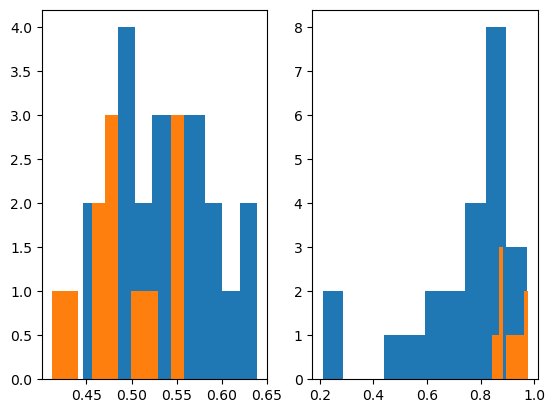

In [50]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].hist(combs_track_features_df['danceability']) #blue 
ax1[0].hist(fgl_track_features_df['danceability'])  #orange 

ax1[1].hist(combs_track_features_df['energy']) #blue
ax1[1].hist(fgl_track_features_df['energy']) #orange

plt.show()

The first histogram above compares the danceability features of Luke Combs' album (blue) and FGL's album (orange). The second histogram compares the energy features between the two albums.

In the first histogram, for Luke Combs, we can see that the songs in this album have high rates of danceability. For example, he has four songs in the section just below 0.50. Following that, he mostly has 2-3 songs per column that have high rates of danceability.
For FGL's album, they fall slightly lower in danceability than Luke Combs. Their songs make it up to the 0.55 mark of danceability and they have at least three songs that fall here; however, they also have a few songs that are below the 0.55 mark.

In the second histogram, Luke Combs' songs grow in energy rates. While he has two songs that fall into the 0.2-0.4 range, he has more songs that continue to grow in more energy. 
For FGL, the songs in this album contain high amounts of energy. You will see that the columns are very small; however, this is because of the number of songs in the albums containing a great amount of energy. In other words, you can see that all of their songs in this album fall within the 0.8-1.0 range. 

<function matplotlib.pyplot.show(close=None, block=None)>

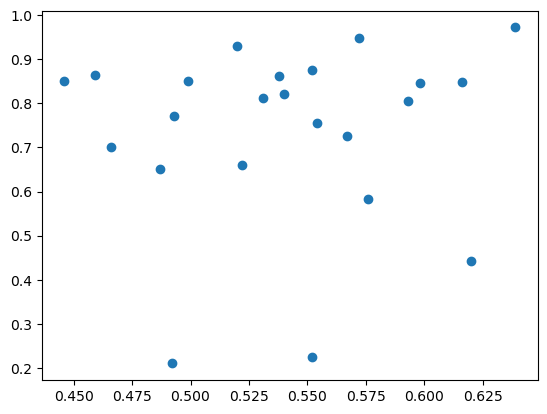

In [51]:
fig2, ax2 = plt.subplots()

ax2.scatter(x = combs_track_features_df['danceability'], 
            y = combs_track_features_df['energy'])

plt.show

The scatter plot above analyzes the danceability (x-axis) and the energy (y-axis) of Luke Combs, "What You See Ain't Always What You Get" Album.

As we can see, Luke Combs has songs that range on every point along the danceability axis. In other words, if you were to play a song at random from this album there is about a 50/50 chance you could either get a song that has a great danceability rating, or one that doesn't. 
However, according to the energy, most songs in this album have higher rates of energy. There are a few points that have low energy; however, if you were to play a song at random, there is a better chance of getting a song with lots of energy. 

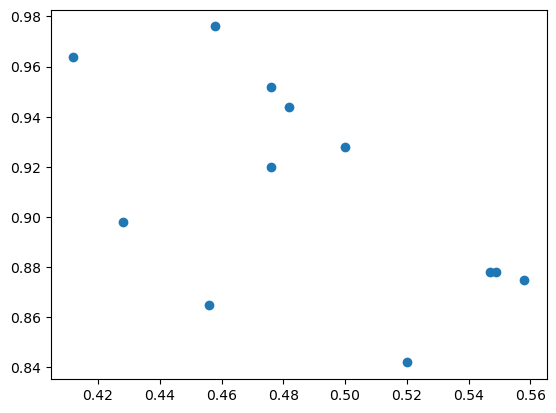

In [52]:
fig3, ax3 = plt.subplots()

ax3.scatter(x = fgl_track_features_df['danceability'],
            y = fgl_track_features_df['energy'])

The scatter plot above analyzes the danceability (x-axis) and the energy (y-axis) of Florida Georgia Line's, "Anything Goes" Album. 

As we can see, there are not many points on this graph and they seem to have a minimal correlation. Some songs in this album have lots of energy, but little danceability, whereas some songs have great danceability with smaller amounts of energy. 

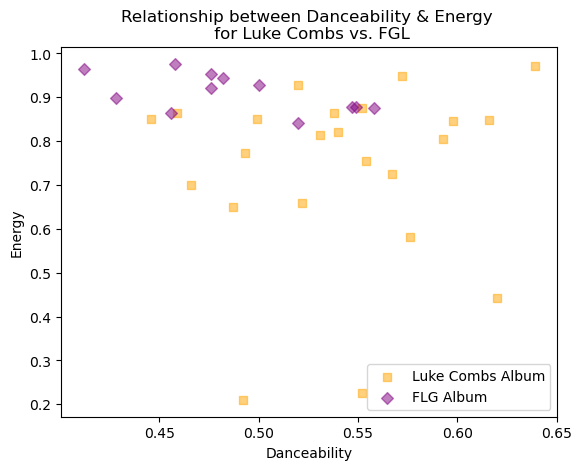

In [53]:
fig4, ax4 = plt.subplots()

ax4.scatter(x = combs_track_features_df['danceability'],
            y = combs_track_features_df['energy'],
            label = 'Luke Combs Album',
            color = 'orange',
            marker = 's',
            alpha = .5)

ax4.scatter(x = fgl_track_features_df['danceability'],
            y = fgl_track_features_df['energy'],
            label = 'FLG Album' ,
            color = 'purple',
            marker = 'D',
            alpha = .5)

ax4.set_xlabel('Danceability')
ax4.set_ylabel('Energy')
ax4.set_title('Relationship between Danceability & Energy \n for Luke Combs vs. FGL')
ax4.legend()

plt.show()

The scatter plot above plots the danceability and energy of both Luke Combs' and FGL's albums together. While there are more songs in Luke Combs' album, it is safe to say that each album has songs with high levels of energy. The danceability is slightly scattered for both albums but they are scattered on a higher level. In other words, they are scattered in their danceability, but most of the songs have high levels of energy. Thus, if you are looking for county songs that have lots of energy, these two albums would be your way to go! I also think that, based on this data and your music preferences, you can find a song that you will love and has great energy and danceability. 

In the next part of my report, I will be using the danceability feature to compare between the albums in a box and scatter plot. 

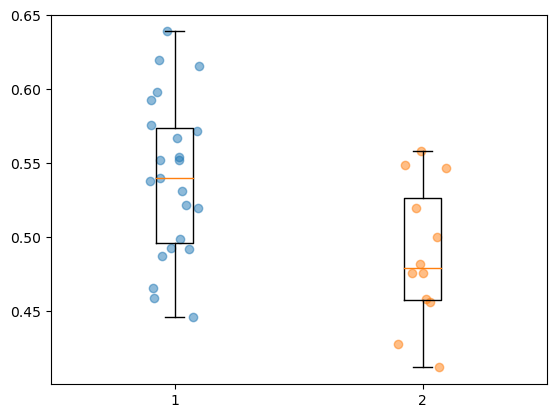

In [54]:
fig5, ax5 = plt.subplots()

combs_xs = [1] * len(combs_track_features_df['danceability'])
fgl_xs = [2] * len(fgl_track_features_df['danceability'])
combs_x_jitter = np.random.uniform(-0.10, .10, len(combs_xs))
fgl_x_jitter = np.random.uniform(-.10, .10, len(fgl_xs))

ax5.boxplot(combs_track_features_df['danceability'], positions = [1]) 
#make the box plot for the Combs Albums Danceability
ax5.boxplot(fgl_track_features_df['danceability'], positions = [2]) 
#make the box plot for the FGL Albums Danceability


ax5.scatter(combs_xs + combs_x_jitter, combs_track_features_df['danceability'], alpha = .5) 
#make the scatter plot for the Combs Albums Danceability
ax5.scatter(fgl_xs + fgl_x_jitter, fgl_track_features_df['danceability'], alpha = .5)  
#make the box plot for the FGL Albums Danceability


plt.show()

In [55]:
combs_dance = combs_track_features_df['danceability'] 
#store combs_track_features_df['danceability'] as combs_dance
fgl_dance = fgl_track_features_df['danceability']
#store fgl_track_features_df['danceability'] as fgl_dance

result1 = stats.ttest_ind(combs_dance, fgl_dance) #create a t-test by using the stored information above

result1

TtestResult(statistic=2.841010382697348, pvalue=0.007648721062960801, df=33.0)

The above calculation demonstrates a t-test. This test determines how significant a particular audio feature (like danceability, energy, speechiness, etc.) is between two different albums. In this case of my study, I compared the significance of the danceability in each album by Luke Combs and FGL to see how much they correlate. 

According to the t-test result (2.841010382697348) and the p-value (0.007648721062960801), the danceability between each of these albums is highly significant and correlated. This tells us that if both of these albums were to go on a date, it would most likely be successful :)

Overall, I think this is a successful project. While there may be some limitations on the data, based on the limitations in my coding skills, I believe I was able to accurately compare the two albums. Perhaps in the future, I can come back to this data and delve deeper into the code and analyze it more in-depth. I can also take more steps to compare more albums and audio features across different types of music I listen to. 